# Growth rates from vapor pressure

In the present notebook we derive the growth rate from the vapor pressure in the proximity of a growing substrate within an epitaxial growth chamber.

The growth material is silicon carbide (SiC)

## Growth rate from source and seed partial pressures

In [10]:
import math
import matplotlib.pyplot as plt

In [11]:
# Some constants related to the gas phase
Rgas = 8.314462618       # Gas constant J/mol K      !
NA = 6.02214076e23       # Avogadro Number
kboltz = Rgas/NA         # J/K
kboltz_ev = 8.1617333262 # eV/K

# Some constants related to the solid growing substrate
M_SiC =  0.0280855 + 0.0120107 # [kg/mol]
M_Si2C = 2*0.0280855 + 0.0120107 # [kg/mol]
M_SiC2 = 0.0280855 + 2*0.0120107 # [kg/mol]
rho_SiC = 3210 # kg/m^3

In [12]:
# Vapor pressures follow an Arrhenius-like behaviour. These are the related prefactors and exponential constants
# for the cubic SiC.

# Avrov Arrhenius-like vapor pressures.
DelH_Si   = 2.04e4 # [K]
DelH_Si2C = 2.81e4 # [K]
DelH_SiC2 = 4.18e4 # [K]
P0_Si   = 10.82  # [K]
P0_Si2C = 13.28  # [K]
P0_SiC2 = 18.18  # [K]

# Lilov  1 1500-2000 Arrhenius-like vapor pressures.
DelH_Si_L1   = 2.74998e4 # [K]
DelH_Si2C_L1 = 3.41772e4 # [K]
DelH_SiC2_L1 = 3.40758e4 # [K]
P0_Si_L1   = 12.8114  # [K]
P0_Si2C_L1 = 15.1877  # [K]
P0_SiC2_L1 = 15.4274  # [K]

# Lilov  2 2000-2546 Arrhenius-like vapor pressures.
DelH_Si_L2   = 2.726132e4 # [K]
DelH_Si2C_L2 = 3.350033e4 # [K]
DelH_SiC2_L2 = 3.352661e4 # [K]
P0_Si_L2   = 12.6921  # [K]
P0_Si2C_L2 = 14.8493  # [K]
P0_SiC2_L2 = 15.1528  # [K]

In [13]:
# Temperature list from the Wellmann excel file
Tsource = 1804.9+273.15  # K   Temperature at the source of the PVT chamber
Tseed_center = 1789.8 + 273.15 # K Temperature at the center of the seed growing wafer
Tseed_edge = 1801.4 + 273.15 # K Temperature at the edge of the seed growing wafer
Tval = np.linspace(Tseed_center, Tseed_edge, 100) # K Temperature list from the center to the wafer edge

In [14]:
fileout=open("SiCAvrov.txt","w")
linenum=len(Tval)
#print(sol1.y[0],sol1.)
i=0
len_SiC2 = 2e-10
p_depSi2C = math.exp(P0_Si2C-DelH_Si2C/Tsource)   # Pascal
loc_depflux_Si2C = p_depSi2C*pow(2.*math.pi*M_Si2C*Rgas*Tsource,-0.5)    # mol/s
p_depSiC2 = math.exp(P0_SiC2-DelH_SiC2/Tsource)   #  Pascal
loc_depflux_SiC2 = p_depSiC2*pow(2.*math.pi*M_SiC2*Rgas*Tsource,-0.5)    # mol/s
l_free = kboltz*Tsource/(pow(2.,0.5)*math.pi*len_SiC2*len_SiC2*p_depSiC2)
print(l_free)
data_avrov = []
while i <= linenum-1 :
    p_Si2C = math.exp(P0_Si2C-DelH_Si2C/Tval[i])   #  Pascal
    loc_evflux_Si2C = p_Si2C*pow(2.*math.pi*M_Si2C*Rgas*Tval[i],-0.5)    # mol/s
    p_SiC2 = math.exp(P0_SiC2-DelH_SiC2/Tval[i])   # 1e5 Bar => Pascal
    loc_evflux_SiC2 = p_SiC2*pow(2.*math.pi*M_SiC2*Rgas*Tval[i],-0.5)    # mol/s
    Gr_SiC = (loc_depflux_Si2C-loc_evflux_Si2C+2*loc_depflux_SiC2-2*loc_evflux_SiC2)*M_SiC/rho_SiC     # m/s
    Gr_SiC = Gr_SiC*1e6*3600     # micron/h
    SupSi2C=(p_depSi2C-p_Si2C)/p_Si2C
    SupSiC2=(p_depSiC2-p_SiC2)/p_SiC2
    fileout.write(str(Tval[i])+'  '+str(SupSiC2)+'  '+str(SupSi2C)+'  '+str(Gr_SiC)+"\n")
    data = {}
    data = {'Tval': Tval[i], 'SupSiC2': SupSiC2, 'SupSi2C': SupSi2C, 'Gr_SiC': Gr_SiC}
    data_avrov.append(data)
    i+=1
fileout.close()

1.11783912025374


In [15]:
fileout=open("SiCLilov.txt","w")
linenum=len(Tval)
#print(sol1.y[0],sol1.)
i=0
len_SiC2 = 2e-10
if Tsource < 2000 :
   p_depSi2C = math.exp(P0_Si2C_L1-DelH_Si2C_L1/Tsource)   # Pascal
   loc_depflux_Si2C = p_depSi2C*pow(2.*math.pi*M_Si2C*Rgas*Tsource,-0.5)    # mol/s
   p_depSiC2 = math.exp(P0_SiC2_L1-DelH_SiC2_L1/Tsource)   #  Pascal
   loc_depflux_SiC2 = p_depSiC2*pow(2.*math.pi*M_SiC2*Rgas*Tsource,-0.5)    # mol/s
else :
   p_depSi2C = math.exp(P0_Si2C_L2-DelH_Si2C_L2/Tsource)   # Pascal
   loc_depflux_Si2C = p_depSi2C*pow(2.*math.pi*M_Si2C*Rgas*Tsource,-0.5)    # mol/s
   p_depSiC2 = math.exp(P0_SiC2_L2-DelH_SiC2_L2/Tsource)   #  Pascal
   loc_depflux_SiC2 = p_depSiC2*pow(2.*math.pi*M_SiC2*Rgas*Tsource,-0.5)    # mol/s
l_free = kboltz*Tsource/(pow(2.,0.5)*math.pi*len_SiC2*len_SiC2*p_depSiC2)
print(l_free)
data_lilov = []
while i <= linenum-1 :
    if Tval[i] < 2000 :
     p_Si2C = math.exp(P0_Si2C_L1-DelH_Si2C_L1/Tval[i])   #  Pascal
     loc_evflux_Si2C = p_Si2C*pow(2.*math.pi*M_Si2C*Rgas*Tval[i],-0.5)    # mol/s
     p_SiC2 = math.exp(P0_SiC2_L1-DelH_SiC2_L1/Tval[i])   # 1e5 Bar => Pascal
     loc_evflux_SiC2 = p_SiC2*pow(2.*math.pi*M_SiC2*Rgas*Tval[i],-0.5)    # mol/s
    else :
     p_Si2C = math.exp(P0_Si2C_L2-DelH_Si2C_L2/Tval[i])   #  Pascal
     loc_evflux_Si2C = p_Si2C*pow(2.*math.pi*M_Si2C*Rgas*Tval[i],-0.5)    # mol/s
     p_SiC2 = math.exp(P0_SiC2_L2-DelH_SiC2_L2/Tval[i])   # 1e5 Bar => Pascal
     loc_evflux_SiC2 = p_SiC2*pow(2.*math.pi*M_SiC2*Rgas*Tval[i],-0.5)    # mol/s
    Gr_SiC = (loc_depflux_Si2C-loc_evflux_Si2C+2*loc_depflux_SiC2-2*loc_evflux_SiC2)*M_SiC/rho_SiC     # m/s
    Gr_SiC = Gr_SiC*1e6*3600     # micron/h
    SupSi2C=(p_depSi2C-p_Si2C)/p_Si2C
    SupSiC2=(p_depSiC2-p_SiC2)/p_SiC2
    fileout.write(str(Tval[i])+'  '+str(p_SiC2)+'  '+str(SupSiC2)+'  '+str(SupSi2C)+'  '+str(Gr_SiC)+"\n")
    data = {}
    data = {'Tval': Tval[i], 'SupSiC2': SupSiC2, 'SupSi2C': SupSi2C, 'Gr_SiC': Gr_SiC}
    data_lilov.append(data)
    i+=1
fileout.close()

0.43053512276234657


In [16]:
plot_names = ['SupSiC2','SupSi2C','Gr_SiC']

In [26]:
def plot_lines(data_name):
    if data_name == 'avrov':
        data_to_plot = data_avrov
    elif data_name == 'lilov':
        data_to_plot = data_lilov

    temp_vect = []
    for x in data_to_plot:
        temp_vect.append(x['Tval'])

    fig = plt.figure(figsize=(30,8.5))
    plt.rcParams.update({'font.size':35})
    plt.rcParams['axes.linewidth'] = 3.0

    i=1
    for name in plot_names:
        vect = []
        for x in data_to_plot:
            vect.append(x[name])
        ax1 = fig.add_subplot(1,len(plot_names),i)
        plt.plot(temp_vect, vect)
        plt.xlabel('Temperature [k]', size=20)
        if name == 'SupSiC2':
            plt.ylabel('Supersaturation SiC$_2$', size=20)
        elif name == 'SupSi2C':
            plt.ylabel('Supersaturation Si$_2$C', size=20)
        elif name == 'Gr_SiC':
            plt.ylabel('3C-SiC Growth rate [micron/hour]', size=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        plt.tick_params(axis='x', direction="in",   top=True, width=3, pad=10)
        plt.tick_params(axis='y', direction="in", right=True, width=3, pad=10)

        i+=1
        #plt.legend(loc=(0.46, 0.58))
        #plt.savefig(name+'.pdf') 
    plt.show()

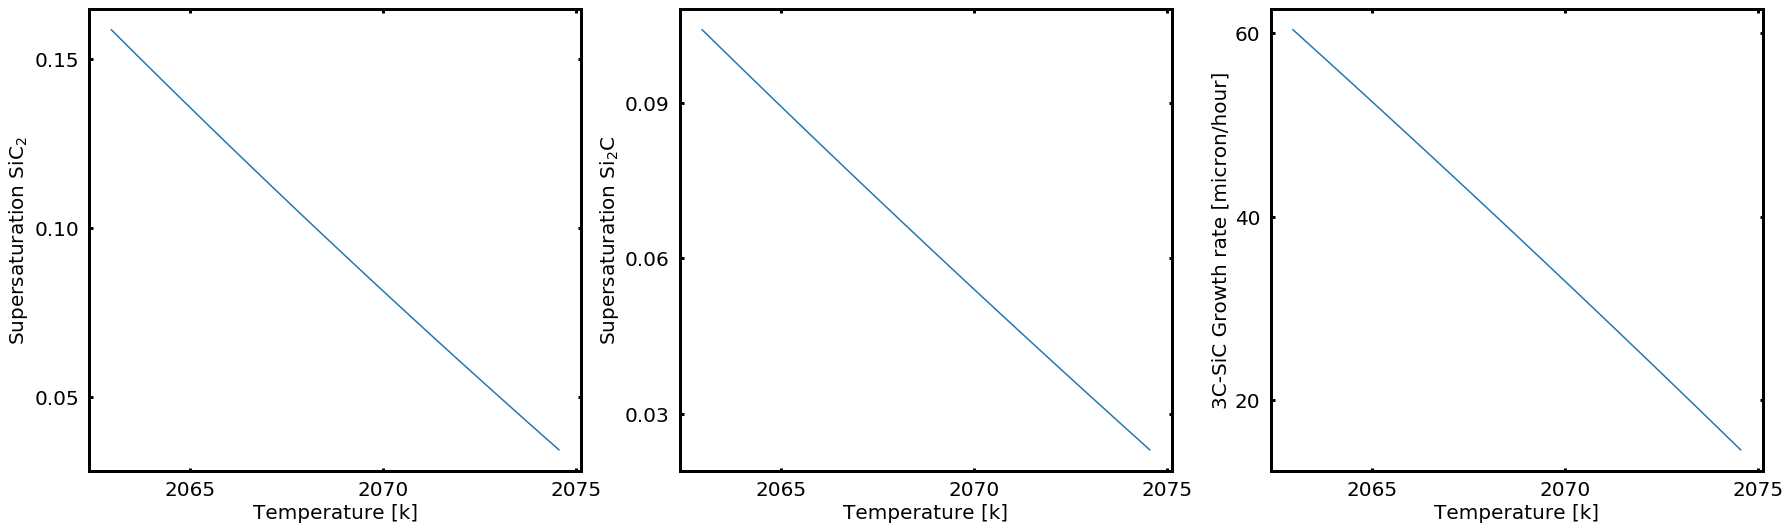

In [27]:
plot_lines('avrov')

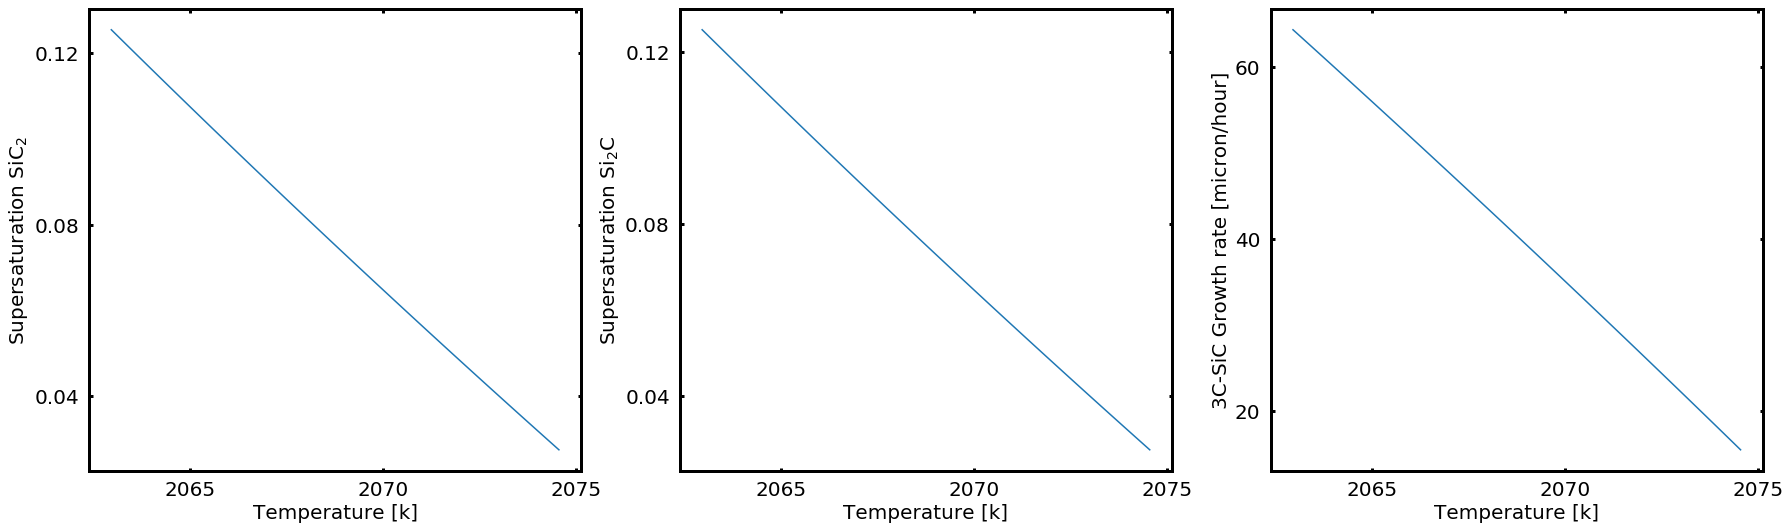

In [28]:
plot_lines('lilov')

In [29]:
# Check differences between Avrov and Lilov calibrations
for name in plot_names:
    max_diff = 0.0
    vect_avrov = []
    for x in data_avrov:
        vect_avrov.append(x[name])
    vect_lilov = []
    for x in data_lilov:
        vect_lilov.append(x[name])
    if len(vect_avrov) == len(vect_lilov):
        for ind in range(len(vect_avrov)):
            diff = abs(vect_avrov[ind] - vect_lilov[ind])
            if diff > max_diff:
                max_ind = ind
                max_diff = diff
    print('{}: max diff {} at {}'.format(name,max_diff,max_ind))

SupSiC2: max diff 0.03327714357523462 at 0
SupSi2C: max diff 0.02120192181102734 at 0
Gr_SiC: max diff 3.9233067971020574 at 0


## Growth rate from evaporation frequencies

In [30]:
import numpy as np
import math
kb=8.617330350e-5 # [eV/K]
kbJ=1.3806485279e-23 # [J/K]
NA=6.02214085774e23 # [mol^-1]
pi=3.141592653589793

In [31]:
# Temperature of the epitaxial process [K]
Temp = Tseed_center

In [32]:
kT=kb*Temp

In [33]:
ESi=np.zeros((4, 4)) # Si energetics of evaporation in eV
EC=np.zeros((4, 4)) # C energetics of evaporation in eV

In [34]:
f=4 # factor for the energetics interpolation

In [35]:
# Coordination 1 of Si from 111 C-terminated 4x1x2 bigdft surface
ESi[0,1]= -6.83 # -4.39 BigDFT # -6.83 # QE 
# Coordination 2 of Si from 100 Si-terminated 3x1x3 dimer surface
ESi[0,2]=-7.04
# Coordination 3 of Si from 111 Si-terminated 4x1x2 surface
ESi[0,3]=-7.77
# Coordination 1 of Si adatom optimized on 111 Si-terminated 4x1x2 surface
ESi[1,0]=-6.72
ESi[1,1]=(f*ESi[1,0]+ESi[0,2])/(f+1) # -6.8 # ESi[1,0] < ESi[1,1] < ESi[0,2]
ESi[1,2]=(f*ESi[0,2]+ESi[0,3])/(f+1) # -6.8 # ESi[0,2] < ESi[1,2] < ESi[0,3]
ESi[2,1]=(f*ESi[1,1]+ESi[0,3])/(f+1) # -6.8 # ESi[1,1] < ESi[2,1] < ESi[0,3]
ESi[2,0]=(f*ESi[1,0]+ESi[2,1])/(f+1) # -6.8 # ESi[1,0] < ESi[2,0] < ESi[2,1]
ESi[3,0]=(f*ESi[2,0]+ESi[2,1])/(f+1) # -6.8 # ESi[2,0] < ESi[3,0] < ESi[2,1]

In [36]:
# Coordination 1 of C from 111 Si-terminated 4x1x2 surface
EC[1,0]=-9.10
# Coordination 2 of C from 100 C-terminated 3x1x3 dimer surface
EC[2,0]=-11.43
# Coordination 3 of C from 111 C-terminated 4x1x2 bigdft surface
EC[3,0]=-11.80
# Coordination 1 of C adatom optimized on 111 C-terminated 4x1x2 bigdft surface
EC[0,1]=-7.76
EC[1,1]= (f*EC[1,0]+EC[2,0])/(f+1) #  -9.8 # EC[1,0] < EC[1,1] < EC[2,0]
EC[1,2]= (f*EC[1,1]+EC[3,0])/(f+1) # -10.0 # EC[1,1] < EC[1,2] < EC[3,0]
EC[0,2]= (f*EC[0,1]+EC[1,2])/(f+1) # -8.1 # EC[0,1] < EC[0,2] < EC[1,2] 
EC[2,1]= (f*EC[2,0]+EC[3,0])/(f+1) # -11.6 # EC[2,0] < EC[2,1] < EC[3,0]
EC[0,3]= (f*EC[0,2]+EC[1,2])/(f+1) # -9.1 # EC[0,2] < EC[0,3] < EC[1,2]

Following we derive prefactors for the evaporation rates starting from the experimental partial pressures of Lilov 1993's work.

In [37]:
A_1={'Si':-27499.8,'Si2C':-34177.2,'SiC2':-34075.8}      # Temperature range 1500-2000 [K]
A_2={'Si':-27261.32,'Si2C':-33500.33,'SiC2':-33526.61}   # Temperature range 2000-2546 [K]
B_1={'Si':12.8114,'Si2C':15.1877,'SiC2':15.4274}         # Temperature range 1500-2000 [K]
B_2={'Si':12.6921,'Si2C':14.8493,'SiC2':15.1528}         # Temperature range 2000-2546 [K]

In [38]:
Pexp={} # [N/m^2]
if 1500 <= Temp <=2000:
    ele='Si'
    Pexp[ele]=math.exp(A_1[ele]/Temp+B_1[ele])
    ele='Si2C'
    Pexp[ele]=math.exp(A_1[ele]/Temp+B_1[ele])
    ele='SiC2'
    Pexp[ele]=math.exp(A_1[ele]/Temp+B_1[ele])
elif 2000 < Temp <=2546:
    ele='Si'
    Pexp[ele]=math.exp(A_2[ele]/Temp+B_2[ele])
    ele='Si2C'
    Pexp[ele]=math.exp(A_2[ele]/Temp+B_2[ele])
    ele='SiC2'
    Pexp[ele]=math.exp(A_2[ele]/Temp+B_2[ele])
else:
    print("error, temperature range not yet implemented.")

In [39]:
mC=12
mSi=28

In [40]:
PSi=Pexp['Si']+(2*mSi/(2*mSi+mC))*Pexp['Si2C']+(mSi/(mSi+2*mC))*Pexp['SiC2'] # [N/m^2]

In [41]:
PC=(mC/(2*mSi+mC))*Pexp['Si2C']+(2*mC/(mSi+2*mC))*Pexp['SiC2'] # [N/m^2]

In [42]:
Bolt_Si=np.zeros((4, 4)) # Probabilities of Si
Bolt_C=np.zeros((4, 4)) # Probabilities of C

In [43]:
Bolt_Si=np.exp(ESi/kT)
Bolt_C =np.exp(EC/kT)

In [44]:
sum_Si=Bolt_Si[0,2]

In [45]:
sum_C=Bolt_C[2,0]

In [46]:
PvSi=PSi*Bolt_Si/sum_Si # [N/m^2]

In [47]:
PvC=PC*Bolt_C/sum_C # [N/m^2]

In [48]:
EvSi=PvSi*math.sqrt(mSi/(NA*2.0*pi*kbJ*Temp)) # [kg/(m^2 s)]

In [49]:
EvC=PvC*math.sqrt(mC/(NA*2.0*pi*kbJ*Temp))

In [50]:
PtransE_Si=EvSi
PtransE_C=EvC

### Growth Rate Check along the [001] direction

In [58]:
rate=EvC[2,0]/rho_SiC # [m/s]
print(rate)

6.50073768431e-07


In [59]:
rate_mh = rate * 1e6 * 3600 # [micron/h]
print(rate_mh)

2340.26556635


In [53]:
time=13408856.4091797

In [54]:
rate_check=1.0/(time*rho_SiC) # [m/s]

In [55]:
rate_micronh = rate_check*1e6*3600 # [micron/h]

In [56]:
print(rate_micronh)

0.08363840232751156


In [57]:
print(rate_check)

2.3232889535419878e-11
